# In the main branch, this file should be no executed and with no parameters set.
# In the development branch, it must be fully executed and must include tests.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import pandas as pd
import numpy as np

import estimate_critical_q as est_qc
import estimate_exponents as est_exps
import tools

## Notebook Parameters

In [3]:
# Set the filename of the database and the visibility parameter v
# Example: 
#
# db_path = 'test__phys_quant.csv'
# v = 0.5
# 
# OBS: At the development time the file test__full.csv was a copy of
# results_databases/bubble_filtering__8_neighbors_squared_network__MXU.csv

db_path = 'test__full.csv'
v = 0.35

Hereafter, the code should not be modified at the standard usage.

## Main

In [4]:
# Read the physical quantities database
full = pd.read_csv(db_path, index_col=0)

# Select the data corresponding to the given visibility v.
phys_quant = full[full.v == v]

# Get the number of sites
N = phys_quant.N.unique()

# Set the index to N and q
phys_quant.set_index(['N','q'], inplace=True)

print('N =', N)

N = [  400  1600  3600  6400 10000]


In [5]:
phys_quant.head()

v         M     M_err   M_noMod  M_noMod_err         X  \
N   q                                                                   
400 0.0000  0.35  0.929314  0.001175  0.929314     0.001175  0.470031   
    0.0025  0.35  0.915629  0.001568  0.915629     0.001568  0.627140   
    0.0050  0.35  0.901901  0.001968  0.901901     0.001968  0.787014   
    0.0075  0.35  0.886529  0.002789  0.886529     0.002789  1.115617   
    0.0100  0.35  0.869761  0.003461  0.869761     0.003461  1.384395   

             X_noMod         U         u  
N   q                                     
400 0.0000  0.470031  0.664950  5.962067  
    0.0025  0.627140  0.664346  5.660639  
    0.0050  0.787014  0.663687  5.410414  
    0.0075  1.115617  0.662522  5.080487  
    0.0100  1.384395  0.661338  4.829217

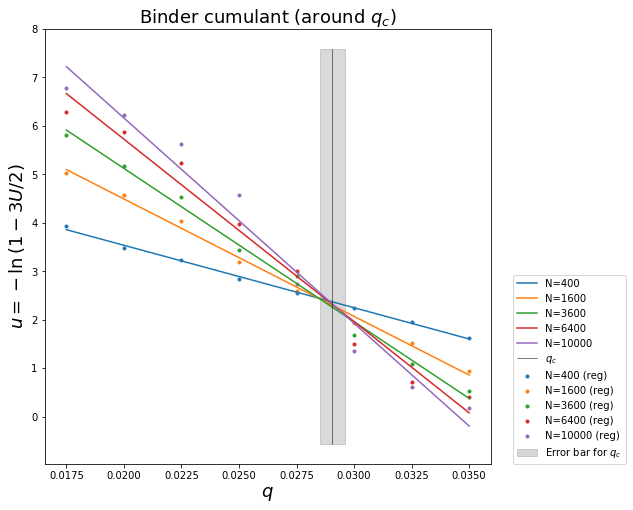


CRITICAL POINT

       q_c       = 0.02905032
       q_c error = 0.00053568



In [6]:
qc, qc_error, best_regs, binder = est_qc.estimate(N[:], phys_quant, 
                                               #min_half_bandwidth=1,
                                               #max_half_bandwidth=3,
                                               do_plot=True)

In [7]:
qc

0.02905032171437636

In [8]:
qc_error

0.0005356842792635562

In [9]:
binder

,q,400,1600,3600,6400,10000
7,0.0175,3.938612,5.025131,5.802473,6.284059,6.786119
8,0.0200,3.478160,4.577541,5.178004,5.865062,6.228353
9,0.0225,3.228392,4.042514,4.535183,5.223840,5.628116
10,0.0250,2.833270,3.191273,3.446837,3.984557,4.582993
11,0.0275,2.544097,2.601975,2.893662,3.009644,2.734407
12,0.0300,2.243061,1.934210,1.680192,1.489736,1.360769
13,0.0325,1.943920,1.514971,1.080334,0.714635,0.605069
14,0.0350,1.631576,0.931930,0.538170,0.408093,0.181591


In [10]:
best_regs

,qi,qf,coef,interc,R2
N,,,,,
400,0.0175,0.035,-128.883878,6.113338,0.996510
1600,0.0175,0.035,-242.283182,9.337377,0.995050
3600,0.0175,0.035,-316.460070,11.451434,0.992538
6400,0.0175,0.035,-376.481560,13.255094,0.978585
10000,0.0175,0.035,-423.803524,14.638270,0.972159


In [11]:
tools.express_measure_with_error(qc, qc_error, label="q_c")

'q_c = 0.0291 ± 0.0005'

### <font color='red'> Remember to set the same value ('L' or 'N' ) for the parameter 'scale_var' in below method calls.</font>

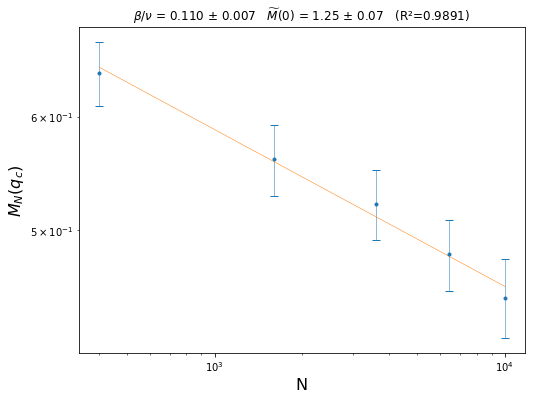

In [12]:
beta_nu, beta_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'beta_nu', qc, N[:], 
                                    phys_quant, scale_var='N', 
                                    do_plot=True)

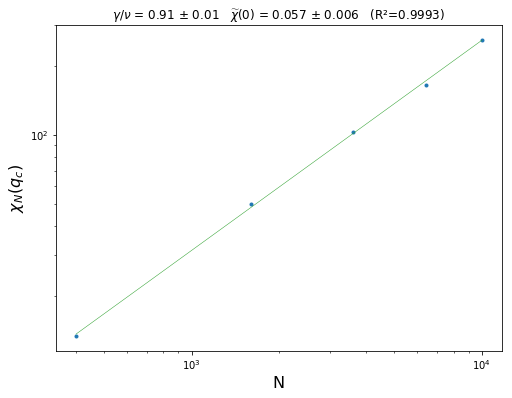

In [13]:
gamma_nu, gamma_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'gamma_nu', qc, N[:], 
                                    phys_quant, scale_var='N', 
                                    do_plot=True)

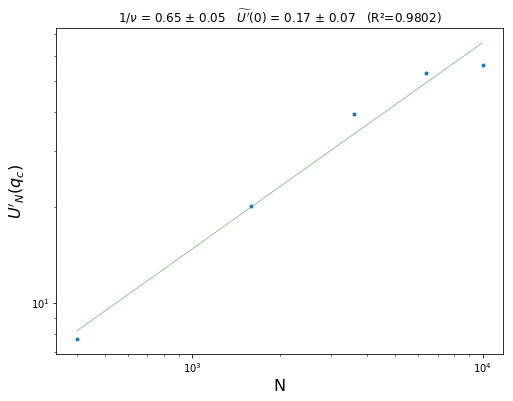

In [14]:
inv_nu, inv_nu_err, _1, _2, _3 = est_exps.estimate_exponent(
                                    'inv_nu', qc, N[:], 
                                    phys_quant, scale_var='N', 
                                    do_plot=True)

In [15]:
D, D_err = est_exps.estimate_D(beta_nu, beta_nu_err, 
                               gamma_nu, gamma_nu_err)
print(tools.express_measure_with_error(D, D_err, label='D'))

D = 1.13 ± 0.03


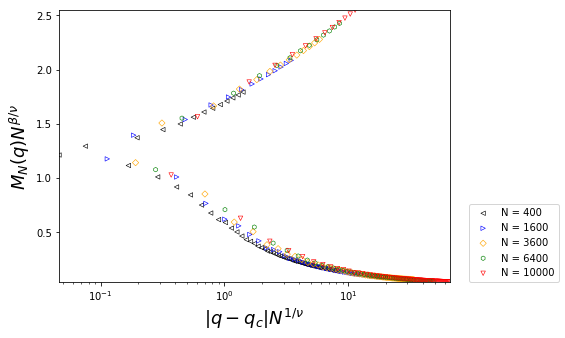

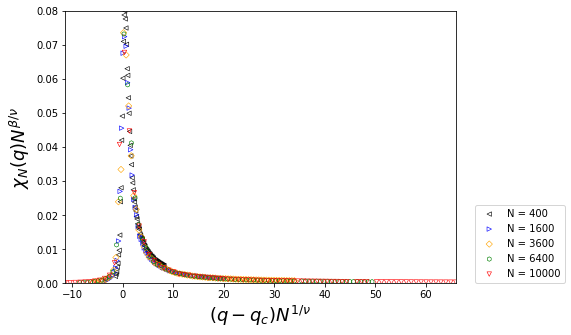

In [16]:
est_exps.data_collapse(qc, beta_nu, gamma_nu, inv_nu, N[:],
              phys_quant, scale_var='N', quantities_labels=['M',"X"])
#plt.xlim(-10,10)
#plt.yscale('log')

<br><br>
## Testing

In [17]:
# I tested the class estimate_critical_q at 
# estimate_critical_q__TESTS.py and estimate_exponents__TESTS.py. 
# Here I will not make any tests.